In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Load Viber data

In [2]:
with open('./android/viber/total_info.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

review_list = []
for line in d:
    rating, text, date, version = line[0].split("******")
    review_list.append([rating,text, date, version])
    
reviews = pd.DataFrame(review_list, columns = ['rating', 'text', 'date', 'version'])
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17126 entries, 0 to 17125
Data columns (total 4 columns):
rating     17126 non-null object
text       17126 non-null object
date       17126 non-null object
version    17126 non-null object
dtypes: object(4)
memory usage: 535.3+ KB


In [3]:
reviews.sample(30)

rating                                               text        date  \
14742    3.0  the new update be a disaster never show me mes...  2015-04-12   
7809     1.0  how do i turn off the vibrate feature every ti...  2015-04-02   
962      4.0       it be gd to use . guyzz u all mst try once .  2015-01-01   
14865    3.0  for the first time all the familiar namuchalsy...  2015-04-12   
3606     5.0                 call work , no static . me happy .  2015-01-08   
13650    2.0  me tell me how to download it on my mobile to ...  2015-04-17   
658      4.0  i love viber but when i go out of viber it say...  2015-01-03   
9923     5.0  the program be very helpful in deal not only w...  2015-05-05   
9183     5.0  give me a chance to catch up with friend and f...  2015-05-24   
6210     5.0  fix bug with this version have less to weaker ...  2015-03-16   
16880    1.0  after the last update , i do n't see any optio...  2015-06-02   
10409    3.0  vseravno crap and not a program , it be easier...  2015-05-02   
10445    4.0  make the set point be not to receive message f...  2015-05-02   
786      1.0  i use huawei ascend y300 , i ca n't video call...  2015-01-02   
5624     5.0  free application and very good ! there be such...  2015-03-20   
5026     1.0     miss label from the phone i can not fix them .  2015-03-26   
8021     4.0  no option to turn off vibration when receive c...  2015-04-01   
15539    2.0  guy , you must add anti spam filter in your pr...  2015-04-10   
872      3.0  if you could just include the chat head option...  2015-01-01   
6170     5.0          how can you use the game ? not download .  2015-03-16   
6025     5.0             in speak i do not hear what they say .  2015-03-17   
16295    5.0  great app ! i be grateful to the creator ! but...  2015-04-08   
9133     2.0                       service go down very often .  2015-05-25   
11090    5.0  it really amaze nice swet cute app so easy to ...  2015-04-29   
4833     4.0              q muxo okay we just lose the signal .  2015-03-27   
1047     5.0  i like the new video call feature , now it be ...  2014-12-31   
6974     4.0                    the new emotion suck big time .  2015-03-08   
11491    5.0  get this app up and run on my samsung gs4 no p...  2015-04-26   
7440     5.0                           great use every day 39 .  2015-03-03   
10312    1.0  j voi not the tofs of my friend and also my ph...  2015-05-02   

          version  
14742  5.3.0.2339  
7809   5.3.0.2274  
962      5.2.1.26  
14865  5.3.0.2339  
3606     5.2.1.36  
13650  5.3.0.2339  
658      5.2.1.26  
9923   5.3.0.2339  
9183   5.3.0.2339  
6210    5.2.2.478  
16880  5.4.0.2519  
10409  5.3.0.2339  
10445  5.3.0.2339  
786      5.2.1.26  
5624    5.2.2.478  
5026    5.2.2.478  
8021   5.3.0.2274  
15539  5.3.0.2339  
872      5.2.1.26  
6170    5.2.2.478  
6025    5.2.2.478  
16295  5.3.0.2339  
9133   5.3.0.2339  
11090  5.3.0.2339  
4833    5.2.2.478  
1047     5.2.1.26  
6974    5.2.2.478  
11491  5.3.0.2339  
7440    5.2.2.478  
10312  5.3.0.2339

In [4]:
# Subset bad reviews (3, 2 or 1 star)
bad_reviews = reviews.loc[reviews['rating'].isin(['1.0','2.0','3.0'])]
bad_reviews.shape

# Subset by the bad version  (5.3.0.2274)
bad_version = reviews.loc[reviews['version'].isin(['5.3.0.2274'])]
print(bad_version.shape)

(655, 4)


# CountVectorizer

In [5]:
# apply thresholds to reduce number of tokens
vectorizer = CountVectorizer(max_df = 0.5, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(bad_version.text)
doc_term_matrix

<655x1206 sparse matrix of type '<class 'numpy.int64'>'
	with 6039 stored elements in Compressed Sparse Row format>

In [6]:
words = vectorizer.get_feature_names()
words[0:20]

['01',
 '03',
 '04',
 '10',
 '100',
 '10mins',
 '12',
 '180',
 '1st',
 '20',
 '2013',
 '2014',
 '2015',
 '24',
 '25mb',
 '2g',
 '2gb',
 '2star',
 '30',
 '31']

In [7]:
# # convert scipy compressed sparse row matrix to sparse Df
# # most words are missing in documents
# doc_term_matrix_df = pd.SparseDataFrame(doc_term_matrix,
#                                         columns = words)
# doc_term_matrix_df.head()

In [8]:
# most frequent words
word_freq = doc_term_matrix.sum(axis = 0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
pd.Series(word_freq_1d, index = words).div(
    reviews.shape[0]).sort_values().tail(20)

video           0.002861
old             0.002920
notification    0.002920
option          0.002978
work            0.003620
ca              0.003971
time            0.004029
phone           0.004146
receive         0.004788
use             0.005080
new             0.006073
turn            0.006306
send            0.006773
vibration       0.007357
app             0.007708
vibrate         0.008467
viber           0.009226
fix             0.011153
update          0.014072
message         0.015824
dtype: float64

In [9]:
# use CountVectorizer with Lemmatization to clean up
import spacy
nlp = spacy.load('en_core_web_sm')
def tokenizer(doc):
    return [w.lemma_ for w in nlp(doc)
               if not w.is_punct | w.is_space]

In [10]:
vectorizer = CountVectorizer(tokenizer = tokenizer, binary = True)
doc_term_matrix = vectorizer.fit_transform(bad_version.text)
doc_term_matrix.shape


(655, 1380)

In [11]:
lemmatized_words = vectorizer.get_feature_names()
word_freq = doc_term_matrix.sum(axis = 0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
word_freq_1d = pd.Series(word_freq_1d, index = lemmatized_words).div(bad_version.shape[0])
word_freq_1d.sort_values().tail(20)

app        0.175573
vibrate    0.178626
but        0.187786
on         0.190840
n't        0.196947
in         0.201527
viber      0.206107
a          0.221374
this       0.236641
please     0.244275
fix        0.282443
not        0.291603
message    0.308397
update     0.340458
and        0.377099
to         0.401527
i          0.480916
be         0.505344
the        0.526718
-PRON-     0.702290
dtype: float64

## TFidVectorizer()
- returns the least number of terms, and also very fast.

In [12]:
tfidf = TfidfVectorizer()
doc_term_matrix = tfidf.fit_transform(bad_version.text)
doc_term_matrix.shape

(655, 1403)

In [13]:
words = tfidf.get_feature_names()
word_freq = doc_term_matrix.sum(axis=0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
word_freq_1d = pd.Series(word_freq_1d, index = words)
word_freq_1d.sort_values().tail(20)

when         19.590504
in           19.692724
call         19.980015
viber        20.011066
turn         21.903249
this         22.834365
off          23.625329
vibration    23.743480
please       24.216831
vibrate      24.324758
my           24.663980
not          25.387394
fix          26.650095
update       29.362052
and          32.549925
message      32.879363
to           37.108042
be           43.826513
the          47.700963
it           50.997858
dtype: float64

# Implementing LSA 

In [14]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17126 entries, 0 to 17125
Data columns (total 4 columns):
rating     17126 non-null object
text       17126 non-null object
date       17126 non-null object
version    17126 non-null object
dtypes: object(4)
memory usage: 535.3+ KB
None


In [15]:
# vectorize review text
vectorizer = CountVectorizer(max_df = .2,
                             min_df = 3,
                             stop_words = 'english')
reviews_dtm = vectorizer.fit_transform(bad_version.text)
words = vectorizer.get_feature_names()
reviews_dtm

<655x371 sparse matrix of type '<class 'numpy.int64'>'
	with 4286 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.decomposition import TruncatedSVD
# assign 5 different topics
svd = TruncatedSVD(n_components = 2,
                  n_iter = 20,
                  random_state = 42)
svd.fit(reviews_dtm)

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=20,
       random_state=42, tol=0.0)

In [17]:
topics = pd.DataFrame(svd.components_.T,
                     index = words)
topics.head()

0         1
10    0.005079  0.005262
20    0.002216  0.002955
2014  0.001868  0.002572
2015  0.001878  0.001730
24    0.000630  0.001062

In [18]:
# very hard to make sense of what the topic actually is
# Also really hard to know how many topics there are, what should T be?
top_20_words = {}
for topic, words_ in topics.items():
    top_20_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_20_words)

0        1
0        vibrate      use
1            app      app
2      vibration     send
3           turn    video
4            new     make
5        receive     love
6           send     apps
7            use     time
8          phone     work
9           time    great
10            ca  quality
11  notification     code
12         annoy     like
13        option      old
14       disable    thank
15       version   recent
16          need     good
17       setting      say
18          make  sticker
19         video    voice

# LDA

## Base LDA model

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
lda_base = LatentDirichletAllocation(n_components=2,
                                    n_jobs = -1,
                                    learning_method='batch')
lda_base.fit(reviews_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=2, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [20]:
topics_count = lda_base.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics_df = pd.DataFrame(topics_prob.T,
                     index=words)
topics_df.sample(20)

(2, 371)


0         1
hope         0.001364  0.002268
voice        0.000243  0.009439
newer        0.001284  0.000246
phone        0.017555  0.010671
fast         0.003819  0.000353
red          0.000620  0.001414
window       0.001068  0.001334
ago          0.004336  0.001038
okay         0.001322  0.000625
permission   0.000197  0.002312
better       0.000198  0.008223
ve           0.002944  0.003447
immediately  0.000247  0.001834
disconnect   0.002768  0.000266
thank        0.003053  0.009659
request      0.000278  0.002643
network      0.000189  0.001477
2015         0.000233  0.002271
code         0.013666  0.000264
big          0.001520  0.000825

In [21]:
# Find top 10 words for each topic
top_10_words = {}
for topic, words_ in topics.items():
    top_10_words[topic] = words_.nlargest(10).index.tolist()
pd.DataFrame(top_10_words)

0      1
0    vibrate    use
1        app    app
2  vibration   send
3       turn  video
4        new   make
5    receive   love
6       send   apps
7        use   time
8      phone   work
9       time  great

In [22]:
# Test LDA with only bad reviews
reviews_dtm = vectorizer.fit_transform(bad_version.text)
words_bad_reviews = vectorizer.get_feature_names()
reviews_dtm
lda_base = LatentDirichletAllocation(n_components=2,
                                    n_jobs = -1,
                                    learning_method='batch')
lda_base.fit(reviews_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=2, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [23]:
topics_count = lda_base.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=words_bad_reviews)
topics.sample(30)

(2, 371)


0         1
sony        0.000758  0.000836
sure        0.000565  0.001044
hi          0.001544  0.000401
location    0.001334  0.000214
incoming    0.008975  0.000233
return      0.001301  0.000249
wont        0.001422  0.000946
understand  0.000197  0.001854
slower      0.002331  0.001204
simple      0.000963  0.001441
open        0.006754  0.002218
android     0.001582  0.006974
totally     0.001582  0.000359
root        0.000193  0.001445
real        0.000207  0.001431
plz         0.002524  0.003063
activate    0.000687  0.003392
day         0.001917  0.002064
fine        0.002861  0.000219
run         0.001161  0.001227
icon        0.000368  0.002083
job         0.001562  0.000381
request     0.001958  0.000781
service     0.000961  0.001856
option      0.018156  0.001898
stay        0.000750  0.002085
block       0.000215  0.001835
hate        0.003222  0.000243
ll          0.001629  0.000308
continue    0.001518  0.000842

In [24]:
# Grouping topics by bad reviews seem much better than putting everything.
# but still hard to make sense of the topic
top_20_words = {}
for topic, words_ in topics.items():
    top_20_words[topic] = words_.nlargest(20).index.tolist()
pd.DataFrame(top_20_words)

0        1
0        vibrate      app
1      vibration      use
2           turn     send
3            new    video
4        receive     work
5             ca    great
6   notification     good
7           time     code
8          annoy    phone
9         option     like
10          send  quality
11       disable  sticker
12           app     make
13           old   recent
14         phone  contact
15       problem      say
16       version   appear
17       setting     need
18          stop    voice
19        latest     time

In [25]:
# retrain until perplexity no longer decreases
lda_opt = LatentDirichletAllocation(n_components = 2,
                                   n_jobs=-1,
                                   max_iter = 500,
                                   learning_method = 'batch',
                                   evaluate_every = 5,
                                   verbose = 1,
                                   random_state = 42)

lda_opt.fit(reviews_dtm)

iteration: 1 of max_iter: 500
iteration: 2 of max_iter: 500
iteration: 3 of max_iter: 500
iteration: 4 of max_iter: 500
iteration: 5 of max_iter: 500, perplexity: 240.9594
iteration: 6 of max_iter: 500
iteration: 7 of max_iter: 500
iteration: 8 of max_iter: 500
iteration: 9 of max_iter: 500
iteration: 10 of max_iter: 500, perplexity: 232.5028
iteration: 11 of max_iter: 500
iteration: 12 of max_iter: 500
iteration: 13 of max_iter: 500
iteration: 14 of max_iter: 500
iteration: 15 of max_iter: 500, perplexity: 230.4514
iteration: 16 of max_iter: 500
iteration: 17 of max_iter: 500
iteration: 18 of max_iter: 500
iteration: 19 of max_iter: 500
iteration: 20 of max_iter: 500, perplexity: 229.4019
iteration: 21 of max_iter: 500
iteration: 22 of max_iter: 500
iteration: 23 of max_iter: 500
iteration: 24 of max_iter: 500
iteration: 25 of max_iter: 500, perplexity: 229.0620
iteration: 26 of max_iter: 500
iteration: 27 of max_iter: 500
iteration: 28 of max_iter: 500
iteration: 29 of max_iter: 500


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=5, learning_decay=0.7, learning_method='batch',
             learning_offset=10.0, max_doc_update_iter=100, max_iter=500,
             mean_change_tol=0.001, n_components=2, n_jobs=-1,
             n_topics=None, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=1)

In [26]:
topics_count = lda_opt.components_
print(topics_count.shape)
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=words_bad_reviews)
topics.sample(10)

(2, 371)


0         1
able         0.001114  0.005232
waste        0.000648  0.000942
recently     0.001834  0.000953
drop         0.000210  0.001772
tablet       0.000243  0.003324
wrong        0.004120  0.000269
root         0.000234  0.001353
month        0.004864  0.000322
huge         0.000996  0.000992
uninstalled  0.000217  0.002557

In [27]:
# doesn't appear to be very different
top_15_words = {}
for topic, words_ in topics.items():
    top_15_words[topic] = words_.nlargest(15).index.tolist()
pd.DataFrame(top_15_words)

0        1
0        vibrate      app
1      vibration      use
2           turn     work
3            new     send
4        receive    video
5             ca     make
6           send     good
7   notification    great
8            old     code
9          annoy    phone
10        option     time
11       disable  quality
12       version    thank
13         phone  sticker
14          time     love

In [28]:
bad_version_preds = lda_opt.transform(reviews_dtm)
print(bad_version_preds.shape)

(655, 2)


In [29]:
# reviews with high probability of being in topic 0
bad_version_eval = pd.DataFrame(bad_version_preds,
                               index = bad_version.text)
bad_version_eval[bad_version_eval[0]>0.9].sort_values(ascending=False, by=0)

0         1
text                                                                  
nice app but there be one super annoy thing . w...  0.981180  0.018820
everytime i receive new message it always vibra...  0.973861  0.026139
i have the old version and i upload it . the ne...  0.972832  0.027168
after today s update i see old all out go call ...  0.972645  0.027355
it still have the same privacy problem that me ...  0.972043  0.027957
update to the latest version , and get the prob...  0.965502  0.034498
since an update it vibrate on incoming message ...  0.964152  0.035848
latest update be a bite buggy . my message do n...  0.963848  0.036152
vibration ca n't be disable for the incoming ms...  0.960616  0.039384
ever since the update , viber have n't stop vib...  0.959690  0.040310
1 . chat send and receive have become very slow...  0.956224  0.043776
after the recent update 5 . 3 . x ? i ca n't st...  0.955956  0.044044
after the recent update 5 . 3 . x ? i ca n't st...  0.955956  0.044044
even if i turn off the vibration for notificati...  0.955220  0.044780
with last update i ca n't turn off vibrate . it...  0.954581  0.045419
be there an option where i cant give you any st...  0.953283  0.046717
update to latest version and it vibrate everyti...  0.952102  0.047898
pls fix it asap , it annoy evn i turn off the v...  0.949886  0.050114
after the new update i ca n't see my recent mes...  0.949455  0.050545
after the last update , whenever i receive mess...  0.949436  0.050564
hi devs . i ve just upgrade to latest ver , now...  0.948620  0.051380
it very slow when i need to send or recive a me...  0.948335  0.051665
after last update today , i ca n't disable vibr...  0.947269  0.052731
after the new update , it vibrate whenever a ms...  0.947148  0.052852
whats wrong with you viber guy ! who on earth i...  0.946930  0.053070
what now ? after the update i can not view the ...  0.945869  0.054131
the order of incoming message be not right . mi...  0.944389  0.055611
please add function to turn off vibration when ...  0.943581  0.056419
there need to be an option to enable disable th...  0.943068  0.056932
since the last update my phone vibrate when new...  0.940964  0.059036
...                                                      ...       ...
fix vibrate for the incoming message notificati...  0.915857  0.084143
one star . it be not acceptable not have an opt...  0.915505  0.084495
everything be fine until a recent update , now ...  0.915451  0.084549
not possible to disable vibration ! it drain ba...  0.915163  0.084837
after update it start vibrate with each notific...  0.914672  0.085328
since the last update it keep show me an miss c...  0.913800  0.086200
ca n't turn off vibration . this be one major b...  0.913716  0.086284
this last night update have bring nasty vibrati...  0.913595  0.086405
with the latest update , there seem to be a bug...  0.912681  0.087319
this version of new update be fuck up . it only...  0.911642  0.088358
vibrate every time i receive a notification , e...  0.911638  0.088362
update app have a triple vibration notification...  0.911365  0.088635
turn off the vibration ! it send and receive me...  0.910980  0.089020
send and receive be both very slow after the up...  0.910512  0.089488
since upgrade to the latest version , the app b...  0.910295  0.089705
unable to disable vibration in the newer version .  0.909098  0.090902
ca n't stop my phone from vibrate when receive ...  0.908319  0.091681
it s vibrate when i receive a message even if i...  0.908075  0.091925
this update totaly break my viber scratch but s...  0.908065  0.091935
the latest update have break viber , none of my...  0.907392  0.092608
i would like to inactivate the vibration every ...  0.907180  0.092820
i can not turn off vibration in recent version ...  0.906574  0.093426
update kill it . ca n't receive any message . j...  0.906314  0.093686
invisible message mean after update thid time i...  0.904750  0.095250
it always vi

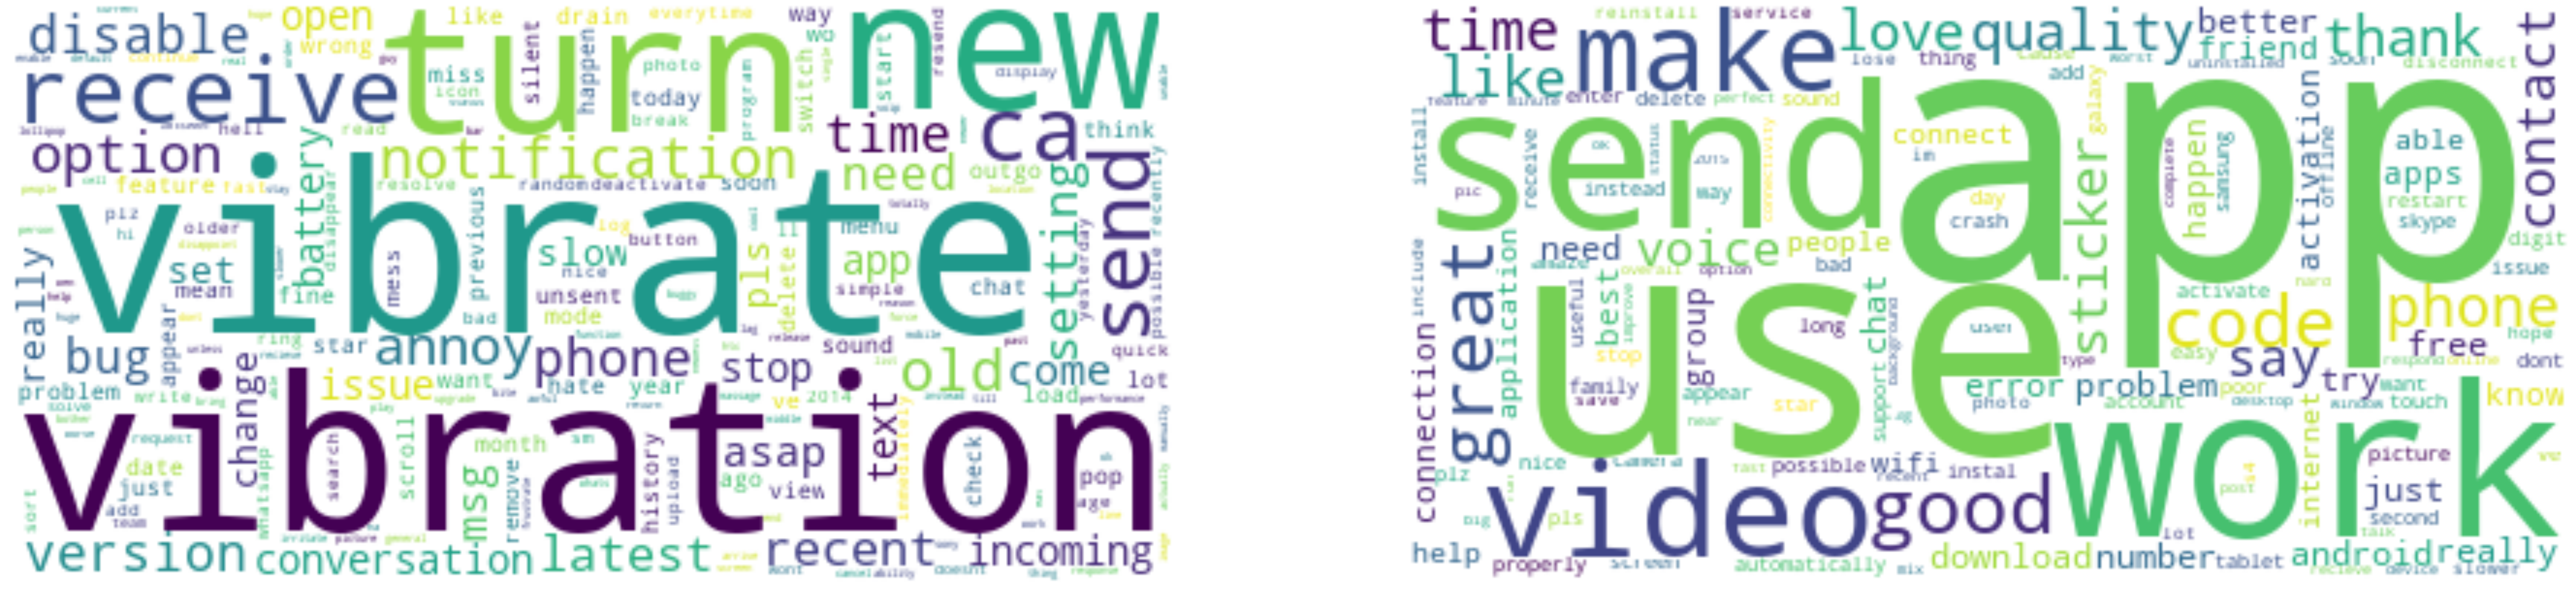

In [30]:
# word clouds by topic 
topics_prob = lda_opt.components_ / lda_opt.components_.sum(axis=1).reshape(-1,1)
topics = pd.DataFrame(topics_prob.T,
                     index=vectorizer.get_feature_names())

from wordcloud import WordCloud
w = WordCloud(background_color = "white")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(120,120))
axes = axes.flatten()
for t, (topic,freq) in enumerate(topics.items()):
    w.generate_from_frequencies(freq.to_dict())
    axes[t].imshow(w, interpolation='bilinear')
#     axes[t].set_title('Topic: {}'.format(topic), fontsize=60)
    axes[t].axis('off')
    
plt.savefig("lda_word_cloud.pdf", dpi=500)


In [31]:
# Label topics on raw data using the highest probability
bad_version_labels = bad_version_eval.idxmax(axis=1)


# UMAP

/home/xuanthu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/home/xuanthu/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 34 separate connected components using meta-embedding (experimental)
  n_components
/home/xuanthu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


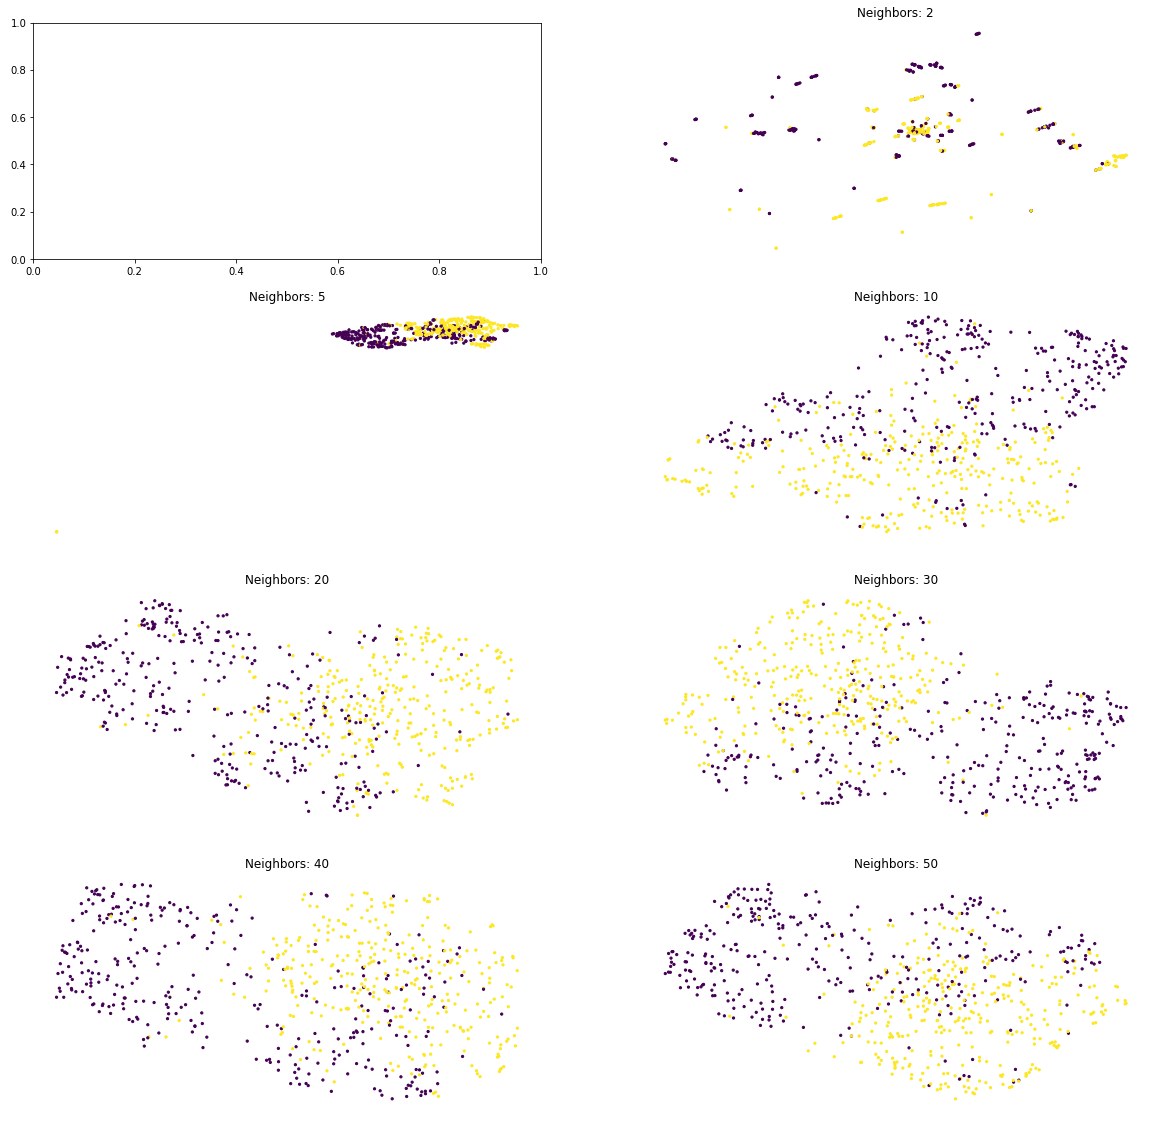

In [32]:
# testing with multiple values of n_neighbors
import umap

labels = bad_version_labels
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (20,20))
axes = axes.flatten()

for i, n in enumerate([2, 5, 10, 20, 30, 40, 50], 1):
    embedding = umap.UMAP(n_neighbors=n).fit_transform(reviews_dtm)
    axes[i].scatter(embedding[:, 0],
                 embedding[:, 1],
                 s = 5,
                 c = labels)
    axes[i].set_title('Neighbors: {}'.format(n), fontsize=12)
    axes[i].axis('off')
    

/home/xuanthu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


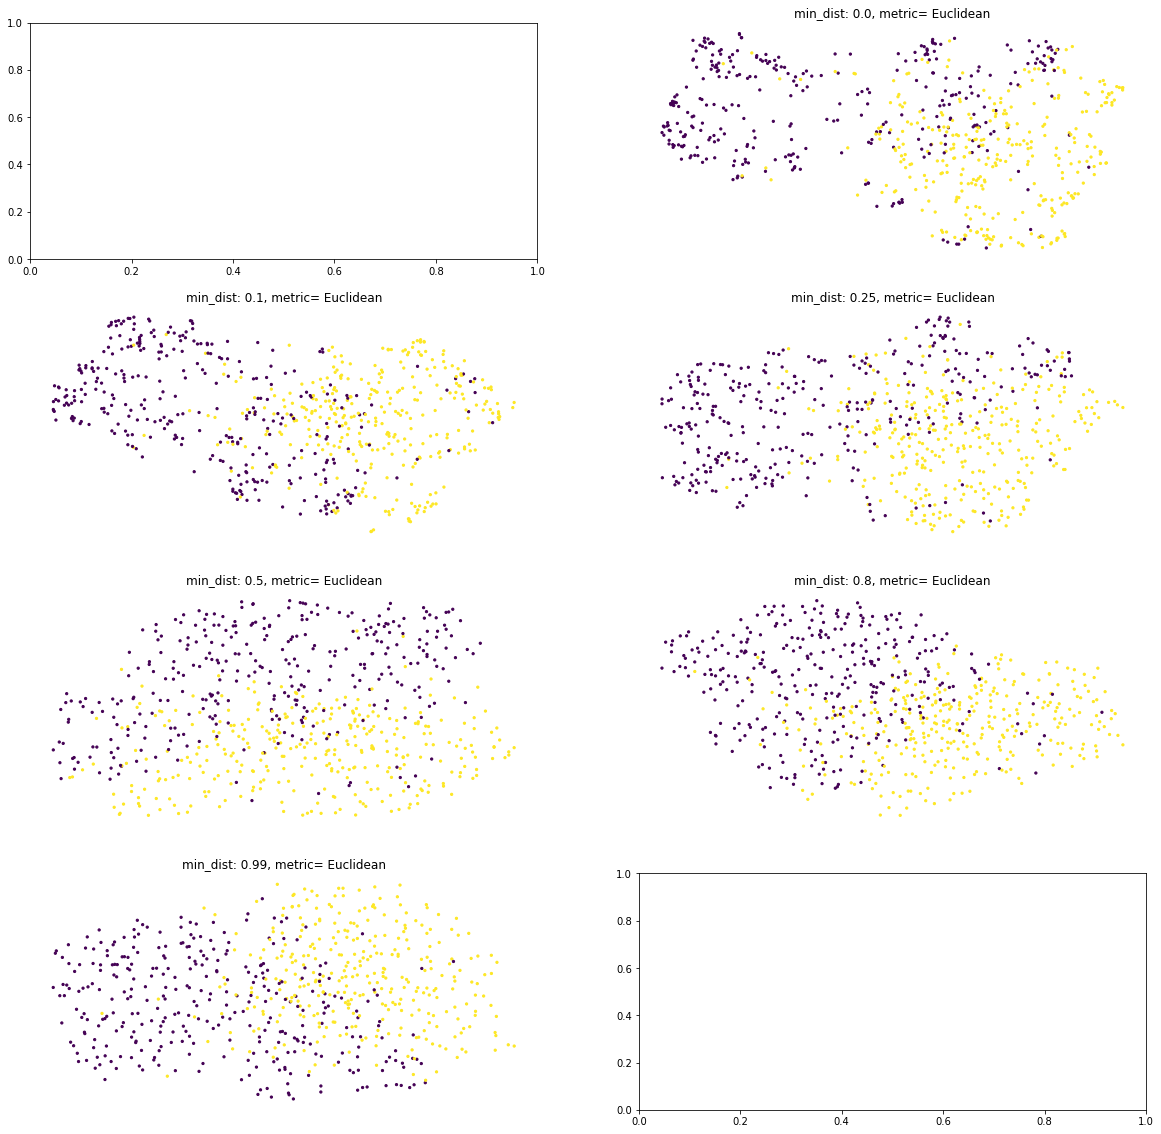

In [33]:
# testing with multiple values of min_dist
labels = bad_version_labels
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (20,20))
axes = axes.flatten()

for i, d in enumerate([0.0, 0.1, 0.25, 0.5, 0.8, 0.99], 1):
    embedding = umap.UMAP(min_dist=d,
                          metric='euclidean',
                          n_components=2).fit_transform(reviews_dtm)
    axes[i].scatter(embedding[:, 0],
                 embedding[:, 1],
                 s = 5,
                 c = labels)
    axes[i].set_title('min_dist: {}, metric= Euclidean'.format(d), fontsize=12)
    axes[i].axis('off')
    

/home/xuanthu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


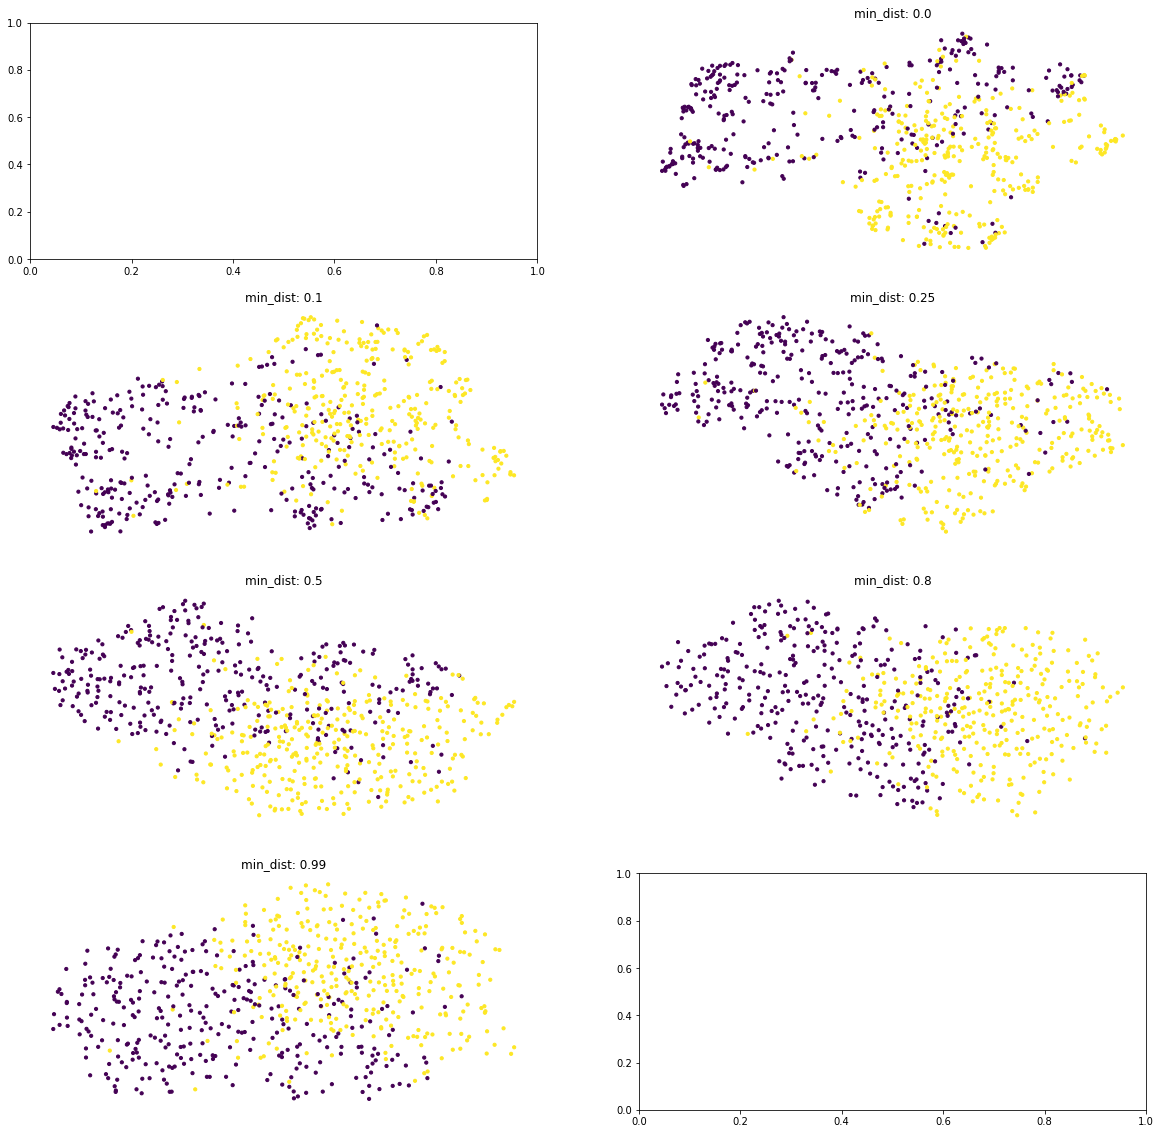

In [34]:
# testing with multiple values of min_dist
labels = bad_version_labels
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (20,20))
axes = axes.flatten()

for i, d in enumerate([0.0, 0.1, 0.25, 0.5, 0.8, 0.99], 1):
    embedding = umap.UMAP(min_dist=d,
                          n_components=2).fit_transform(reviews_dtm)
    axes[i].scatter(embedding[:, 0],
                 embedding[:, 1],
                 s = 10,
                 c = labels)
    axes[i].set_title('min_dist: {}'.format(d), fontsize=12)
    axes[i].axis('off')
    

/home/xuanthu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/home/xuanthu/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 34 separate connected components using meta-embedding (experimental)
  n_components
/home/xuanthu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


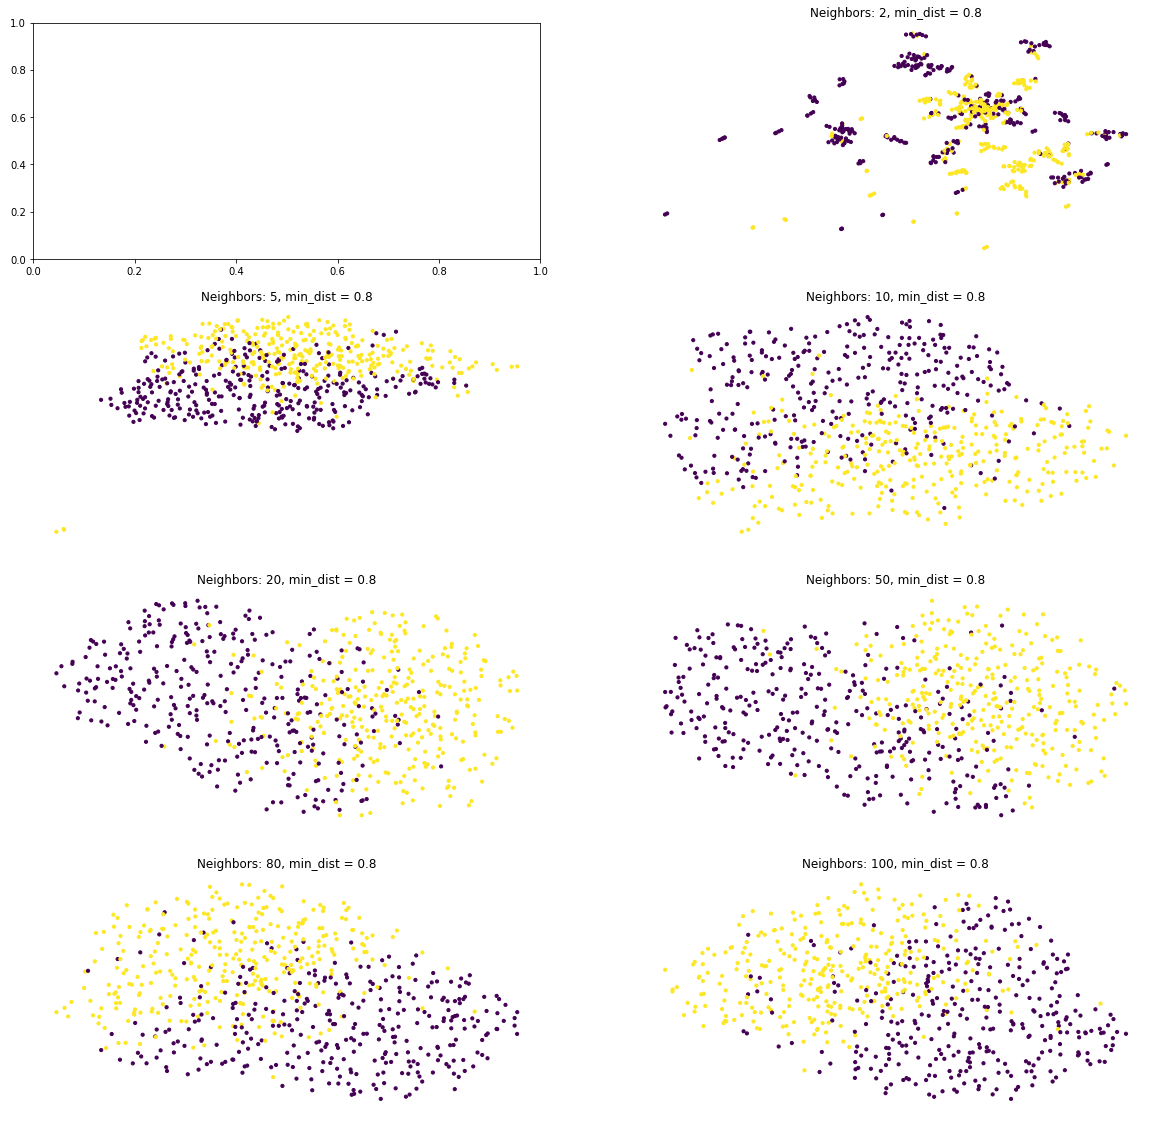

In [35]:
# this is very slow
# testing with multiple values of n_neighbors
import umap

labels = bad_version_labels
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (20,20))
axes = axes.flatten()

for i, n in enumerate([2, 5, 10, 20, 50, 80, 100], 1):
    embedding = umap.UMAP(n_neighbors=n,
                          min_dist = 0.8).fit_transform(reviews_dtm)
    axes[i].scatter(embedding[:, 0],
                 embedding[:, 1],
                 s = 10,
                 c = labels)
    axes[i].set_title('Neighbors: {}, min_dist = 0.8'.format(n), fontsize=12)
    axes[i].axis('off')
    

In [36]:
# visualize with Bokeh
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import *

output_file("umap_bokeh_plot.html", title="UMAP Bokeh plot bad reviews")


In [37]:
embedding = umap.UMAP(min_dist = 0.8, n_neighbors = 50).fit_transform(reviews_dtm)
embedding_df = pd.DataFrame(embedding, columns=('x', 'y'), index = bad_version_eval.index) 
bad_version = bad_version.set_index(bad_version.text)
embedding_df['rating'] = bad_version['rating'].astype(str)
embedding_df['lda_label'] = "Topic " + bad_version_labels.astype(str)
embedding_df

/home/xuanthu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


x           y  \
text                                                                         
put the upload bar under picture and video or .     129.097107  112.993523   
the last update be not as good as pervious vers...  132.218536  115.152046   
the video quality be very bad .                     132.528519  115.548531   
before it not like this . but right now it wont...  127.768929  114.282211   
sometimes it keep reconnecting i do n't know wh...  132.674423  112.875877   
after the last update it vibrate for every sing...  127.733765  114.897842   
free call not work on huawei y530 u00 with andr...  132.732376  115.053497   
there be the best in the world offer !              130.990814  113.518478   
send and receive message be very slow . it take...  127.204803  113.276619   
after the update where time itself viber and no...  131.197968  115.192375   
this be the best way to keep in touch with my f...  131.794678  114.834236   
since i update it yesterday on my s5 , viber vi...  126.476524  112.746468   
this app consistently run mm daemon camera proc...  132.492203  112.644943   
it s free most people use it , but still no mat...  130.399063  113.172539   
work really well now it s show me message i sen...  128.415329  113.437027   
if you could enable us to search for some word ...  130.773697  114.710548   
after the recent update 5 . 3 . x ? i ca n't st...  128.556778  118.341843   
determine the location of the brake so that by ...  130.877670  115.344978   
i cant use video call from samsung gal s advanc...  129.525711  111.051704   
why i ca n't see any message after i update my ...  128.162476  114.756042   
it not send me the code . it keep tell me error .   127.350388  111.466713   
a lot of ghost message after last update .          130.134995  113.724335   
the new update mean my phone vibrate every time...  126.603386  113.870926   
please change this or i be go back to previous ...  131.380524  116.060555   
slower than it use to be , vibrate sometimes wi...  127.539223  113.809746   
just tell me how to make a video call use this ...  130.542374  111.390045   
update app have a triple vibration notification...  125.790268  117.951027   
thank to viber for i use free call and text mes...  130.120041  111.236275   
it be unable to show my recent profile pic . sh...  129.292511  113.946136   
it a great app but me and my friend love horse ...  132.708664  112.604370   
...                                                        ...         ...   
nowadays recharge phone be reduce our money als...  129.554138  114.543556   
viber team pls help and the latest update have ...  128.945709  116.309052   
video call application not show even use best p...  129.910217  111.085228   
thank you , viber team , for make it again my f...  131.610565  112.160713   
be not able to see my previous message after up...  128.454971  113.309288   
love it but until now i be not connect to viber...  128.082565  112.599724   
how do i turn it off ?                              128.718643  115.833519   
i m use nexus 5 . so some day ago my camera be ...  130.801468  112.794518   
sticker cute . bt i hv download it fr free call...  131.270081  114.374290   
very good this app . realy i like it . some tim...  132.339996  112.931259   
vibration be permanently on , even if set to of...  129.374466  117.231667   
work great , after a spate of quot . other quot...  132.437592  114.025238   
i have use this app for most of my friend and r...  131.970108  111.552597   
i m not get to see if anyone see my message sin...  129.366211  114.531494   
why ca n't i give less than 1 star , this be in...  128.455002  114.625793   
already enter my number but have not receive an...  128.651764  112.111229   
video call have more bug pls fix it .               129.499084  113.025002   
it right but fix the problemwhen i call anyone ...  131.160568  114.682243   
everytime i put my number in to get my activati...  129.000412  112.038933   
it sa

In [38]:
datasource = ColumnDataSource(embedding_df)

color_mapping = CategoricalColorMapper(factors=['Topic 0','Topic 1'],
                                       palette=['#CC79A7', '#56B4E9'])

plot_figure = figure(
    title='UMAP projection of reviews for version 5.3.0.2274',
    plot_width=800,
    plot_height=500,
    tools=('pan, wheel_zoom, reset'),
    toolbar_location="below"
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <span style='font-size: 12px; color: #224499'>Review:</span>
        <span style='font-size: 12px'>@text</span>
        <span style='font-size: 12px; color: #224499'>Rating:</span>
        <span style='font-size: 12px; color: #224499'>@rating:</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='lda_label', transform=color_mapping),
    line_alpha=0.3,
    fill_alpha=1,
    size=7,
    legend = 'lda_label'
)
umap_plot = show(plot_figure, notebook_handle=True)
